# Investment Analysis Assignment


### By: Dev Kumar Singh

Introduction:  Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global                  trends in investments so that she can take the investment decisions effectively.

In [1]:
# Lets import the necessary libraries
import numpy as np

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format='{:,.2f}'.format

Loading the company and rounds 2 files to pandas dataframe 

In [3]:
companies = pd.read_csv(r'C:\Users\SDS\Downloads\Investment assignment\companies.csv',encoding='ISO-8859-1')
rounds2 = pd.read_csv(r'C:\Users\SDS\Downloads\Investment assignment\rounds2.csv',encoding='ISO-8859-1')

In [4]:
companies.shape
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.shape
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
unique_rounds2 = len(rounds2.company_permalink.unique())

In [7]:
unique_companies = len(companies.permalink.unique())

In [8]:
unique_rounds2

90247

In [9]:
unique_companies

66368

It can be observed from the data that the permalink column has some entry as uppercase while some as lower case. Converting complete company_permalink column to lower case

In [10]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [11]:
unique_rounds2=len(rounds2["company_permalink"].unique())
unique_rounds2

66370

In [12]:
unique_companies=len(companies.permalink.unique())
unique_companies

66368

#### Now I am giving the answers for the questions in Table 1.1

Ques 1. - How many unique companies are present in rounds2?

Ans. - 66370

Ques 2. - How many unique companies are present in the companies file?

Ans. - 66368

Ques 3. - In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

Ans. - Permalink

Ques 4. - Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

Ans. - Yes there is difference of 2

#### Merging the two dataframes

In [13]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [14]:
master_frame.shape

(114949, 16)

Ques 5. - Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

Ans. - 114949 rows and 16 columns are present in master dataframe.

##### Cleaning the merged data set for further analysis

In [15]:
# summing up the missing values count (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [16]:
# missing values per column expressed as % of total number of values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.01
name                       0.01
homepage_url               5.34
category_list              2.97
status                     0.01
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.86
dtype: float64

'raised_amount_usd' is a required column for analysis. Blank or null values in this field can either be deleted or imputed statistically.
Here, choosing to remove these values for analysis as it accounts for 17% of data.

In [17]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [18]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [19]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [20]:
master_frame.shape

(94959, 16)

In [21]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        70.34
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
founded_at                16.81
dtype: float64

Further, the missing data columns of 'funding_round_code', 'founded_at', 'homepage_url' which are 70.34%,16.81% and 4.56% of data are not required for this analysis. Hense, droping these columns.

On the other hand the columns, country_code and category_list are needed for the analysis. Therefore removing rows with null or empty value in these columns.

In [22]:
master_frame = master_frame.drop(['funding_round_code','founded_at','homepage_url'], axis=1)

In [23]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

In [24]:
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [25]:
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [26]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
state_code                1.96
region                    1.34
city                      1.33
dtype: float64

Leaving the other null values. These are a very low percentage and are not a part of this analysis. We can remove such records but we decide to leave as they will not impact the analysis parameters

In [27]:
master_frame.shape

(88529, 13)

## Funding Type Analysis

Identifying the most suitable investment type for Sparks Fund as specified, Sparks fund want to choose between one of the four investment type(seed, angel, venture, private_equity).

In [28]:
master_frame = master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [29]:
master_by_fundingtype = master_frame.groupby('funding_round_type')

In [30]:
# Here I use the aggregate function median to show the most representative value of the investment amount for each of the four funding type
master_by_fundingtype['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity   20,000,000.00
venture           5,000,000.00
angel               414,906.00
seed                300,000.00
Name: raised_amount_usd, dtype: float64

##### So clearly From the above, 'Venture' type of Investment is ideal investment for Sparks Fund. It satisfy the investment constrain of investment of 5M to 15M USD.

#### So from this analysis I can answer all the questions from Table 2.1

Quest.1- Representative funding amount of venture type. 

Ans-       5,000,000

Quest.2- Representative funding amount of angel type.

Ans- 414,906

Quest.3- Representative funding amount of seed type.

Ans- 300,000

Quest.4- Representative funding amount of private equity type.

Ans- 20,000,000

Quest.5- Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

Ans.- 'Venture type' because it comes under 5M to 15M slot.

## Country Analysis

Now for further analysis I only took the venture type investment so filtering the data accordingly.

In [31]:
venture_df = master_frame[master_frame['funding_round_type']=='venture']

Now finding the top9 countries which recieved highest funding. So for this I did groupby on country code.

In [32]:
venture_by_country = venture_df.groupby('country_code')

In [33]:
#Now to check the highest amount of funding for each country
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   420,068,029,342.00
CHN    39,338,918,773.00
GBR    20,072,813,004.00
IND    14,261,508,718.00
CAN     9,482,217,668.00
             ...        
MCO           657,000.00
SAU           500,000.00
CMR           359,561.00
GTM           300,000.00
MMR           200,000.00
Name: raised_amount_usd, Length: 97, dtype: float64

In [34]:
#Now taking only the top9 countries 
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA   420,068,029,342.00
CHN    39,338,918,773.00
GBR    20,072,813,004.00
IND    14,261,508,718.00
CAN     9,482,217,668.00
FRA     7,226,851,352.00
ISR     6,854,350,477.00
DEU     6,306,921,981.00
JPN     3,167,647,127.00
Name: raised_amount_usd, dtype: float64

Now filtering the data with top9 countries only

In [35]:
top9 = venture_df[venture_df['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]

Manually checking that which country has its official language as0 english from wikepedia

Wikipage URL: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

USA - YES

CHN - NO

GBR - YES

IND - YES

CAN - YES

FRA - NO

ISR - NO

DEU - NO

JPN - NO

##### So from this analysis I can answer all the questions in Table 3.1

Quest.1: Top English speaking country

Ans.: USA (United States of America) 

Quest.2: Second English speaking country

Ans.: GBR (United Kingdom)

Quest.3: Third English speaking country

Ans.: IND (India)

## Sector Analysis

In [36]:
#Loading the mapping dataset
mapping = pd.read_csv(r'C:\Users\SDS\Downloads\Investment assignment\mapping.csv')

In [37]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


For analysis we remove the null rows from the mapping dataframe

In [38]:
mapping = mapping[~mapping.category_list.isnull()]

In [39]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


Writing a custom function to correct category_list column of the mapping file.

In [40]:
#function to correct the mapping data. It can be observed from the above data that at many palces na is misprinted as 0
# Example: Analytics is written as A0lytics
def correct_mapping(category):
    if '0' in category:
        if category.startswith('0'):  # Handle 0notechnology case with NA
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith('0'):  #ignores the 2.0 case with 0 at the end 
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category

Calling the custom function correct_mapping to correct the category_list column in the mapping dataset

In [41]:
mapping['category_list'] = list(map(correct_mapping,mapping['category_list']))

In [42]:
# to check whether the custom function is working fine or not
mapping.head(22)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


Mapping the category_list in the top9 dataframe to the main_sector in the mapping file. Before merging these two dataframes creating a new column main_sector in the mapping dataframe to get the main sectore name of each category.

In [43]:
m = pd.melt(mapping, id_vars = ['category_list'], var_name = ['main_sector'])

In [44]:
m = m[m.value==1]

In [45]:
m = m.drop('value',axis=1)

In [46]:
m

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [47]:
m.shape

(687, 2)

In [48]:
m.isnull().sum()

category_list    0
main_sector      0
dtype: int64

Now For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.


After discussing with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.
Creating a new column primary_sector to store this information in the Dataframe.

In [49]:
top9['primary_sector'] = top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [50]:
top9.shape

(44118, 14)

In [51]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,"14,219,999.00",/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,"555,016.00",/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,"140,500.00",/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,"8,500,000.00",/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology


In [52]:
top9.primary_sector.value_counts(ascending = False)

Biotechnology          6413
Software               3859
Advertising            2061
Health Care            1741
Enterprise Software    1688
                       ... 
Office Space              1
Portals                   1
Online Scheduling         1
High Tech                 1
Mens Specific             1
Name: primary_sector, Length: 587, dtype: int64

In [53]:
# Now merging the dataframes
top9 = pd.merge(top9,m,how='left', left_on='primary_sector',right_on='category_list')

In [54]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [55]:
# so on merging there are two same cloumns(category_list_x & category_list_y) created so dropping one 'category_list_y'
top9 = top9.drop('category_list_y',axis=1)

In [56]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


In [57]:
top9['main_sector'].head()

0                              Entertainment
1                 News, Search and Messaging
2                 Cleantech / Semiconductors
3    Social, Finance, Analytics, Advertising
4    Social, Finance, Analytics, Advertising
Name: main_sector, dtype: object

Checking for the null values in main_sector in merged dataframe

In [58]:
len(top9[top9['main_sector'].isnull()])

12

In [59]:
top9 = top9[~(top9['main_sector'].isnull())]

In [60]:
len(top9[top9['main_sector'].isnull()])

0

In [61]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising"


### Creating three separate data frames D1, D2 and D3 for each of the top three countries (USA, GBR, IND) containing the observations of funding type venture falling within the 5-15 million USD range.

## Sector Analysis - USA

Creating Data frame D1 for country USA

In [62]:
D1=top9[top9['country_code']=='USA']

In [63]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

Total amount raised in USA

In [64]:
D1.raised_amount_usd.sum()

107757097294.0

In [65]:
D1.raised_amount_usd.count()

12063

In [66]:
D1.shape

(12063, 15)

Finding the top sectors with the highest number of investments in USA.

In [67]:
D1_by_sector=D1.groupby('main_sector')

In [83]:
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [84]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                    26,321,007,002.00
Social, Finance, Analytics, Advertising   23,807,376,964.00
Cleantech / Semiconductors                21,633,430,822.00
News, Search and Messaging                13,971,567,428.00
Health                                     8,211,859,357.00
Manufacturing                              7,258,553,378.00
Entertainment                              5,099,197,982.00
Automotive & Sports                        1,454,104,361.00
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 1st Top sectors of the country.

In [71]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector  permalink                        
Others       /organization/virtustream           64,300,000.00
             /organization/capella               54,968,051.00
             /organization/airtight-networks     54,201,907.00
             /organization/decarta               52,100,000.00
             /organization/black-duck-software   51,000,000.00
                                                      ...     
             /organization/capton                 5,000,000.00
             /organization/capital-teas           5,000,000.00
             /organization/campus-quad            5,000,000.00
             /organization/campus-explorer        5,000,000.00
             /organization/netqos                 5,000,000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [73]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector                              permalink                     
Social, Finance, Analytics, Advertising  /organization/shotspotter        67,933,006.00
                                         /organization/demandbase         63,000,000.00
                                         /organization/intacct            61,800,000.00
                                         /organization/netbase            60,600,000.00
                                         /organization/lotame             59,700,000.00
                                                                               ...     
                                         /organization/logi-analytics      5,000,000.00
                                         /organization/smartturn           5,000,000.00
                                         /organization/fractal-sciences    5,000,000.00
                                         /organization/amtec-lcc           5,000,000.00
                                         /organi

## Sector Analysis - GBR (United Kingdom)

Creating Data frame D2 for country GBR

In [74]:
D2=top9[top9['country_code']=='GBR']

In [75]:
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

Total amount raised in GBR

In [76]:
D2.raised_amount_usd.sum()

5379078691.0

In [77]:
D2.raised_amount_usd.count()

621

In [78]:
D2.shape

(621, 15)

Finding the top sectors with the highest number of investments in GBR

In [79]:
D2_by_sector=D2.groupby('main_sector')

In [80]:
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [85]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                    1,283,624,289.00
Cleantech / Semiconductors                1,163,990,056.00
Social, Finance, Analytics, Advertising   1,089,404,014.00
News, Search and Messaging                  615,746,235.00
Entertainment                               482,784,687.00
Manufacturing                               361,940,335.00
Health                                      214,537,510.00
Automotive & Sports                         167,051,565.00
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 1st Top sectors of the country.

In [87]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector  permalink                            
Others       /organization/electric-cloud            37,000,000.00
             /organization/sensage                   36,250,000.00
             /organization/enigmatic                 32,500,000.00
             /organization/silverrail-technologies   29,000,000.00
             /organization/opencloud                 27,972,766.00
                                                          ...     
             /organization/parcelgenie                5,000,000.00
             /organization/vector-watch               5,000,000.00
             /organization/thefilter                  5,000,000.00
             /organization/udex                       5,000,000.00
             /organization/bacula-systems             5,000,000.00
Name: raised_amount_usd, Length: 120, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [88]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies   37,500,000.00
                                         /organization/mythings                34,000,000.00
                                         /organization/zopa                    32,900,000.00
                                         /organization/imagini                 28,550,000.00
                                         /organization/marketinvoice           25,553,007.00
                                                                                    ...     
                                         /organization/moo                      5,000,000.00
                                         /organization/rangespan                5,000,000.00
                                         /organization/tamoco                   5,000,000.00
                                         /organization/the-fizzback-group       5,000,

## Sector Analysis - India

Creating Data frame D2 for country GBR

In [90]:
D3=top9[top9['country_code']=='IND']

In [91]:
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]

Total amount raised in IND

In [92]:
D3.raised_amount_usd.sum()

2949543602.0

In [93]:
D3.raised_amount_usd.count()

328

In [94]:
D3.shape

(328, 15)

Finding the top sectors with the highest number of investments in IND

In [95]:
D3_by_sector=D1.groupby('main_sector')

In [97]:
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [98]:
D3_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                    26,321,007,002.00
Social, Finance, Analytics, Advertising   23,807,376,964.00
Cleantech / Semiconductors                21,633,430,822.00
News, Search and Messaging                13,971,567,428.00
Health                                     8,211,859,357.00
Manufacturing                              7,258,553,378.00
Entertainment                              5,099,197,982.00
Automotive & Sports                        1,454,104,361.00
Name: raised_amount_usd, dtype: float64

Finding the highest invested company among the 1st Top sectors of the country.

In [99]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector  permalink                        
Others       /organization/firstcry-com          39,000,000.00
             /organization/myntra                38,000,000.00
             /organization/commonfloor           32,900,000.00
             /organization/pepperfry-com         28,000,000.00
             /organization/itzcash-card-ltd      25,000,000.00
                                                      ...     
             /organization/reznext                5,000,000.00
             /organization/voonik-com             5,000,000.00
             /organization/vedantu-innovations    5,000,000.00
             /organization/securens               5,000,000.00
             /organization/liases-foras           5,000,000.00
Name: raised_amount_usd, Length: 88, dtype: float64

Finding the highest invested company among the 2nd Top sectors of the country.

In [100]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False)

main_sector                              permalink                                                 
Social, Finance, Analytics, Advertising  /organization/manthan-systems                                50,700,000.00
                                         /organization/komli-media                                    28,000,000.00
                                         /organization/shopclues-com                                  25,000,000.00
                                         /organization/intarvo                                        21,900,000.00
                                         /organization/grameen-financial-services                     21,556,050.00
                                         /organization/bankbazaar                                     19,000,000.00
                                         /organization/microland                                      18,300,000.00
                                         /organization/eka-software-solutions           

## PLOTS

1. A plot showing the representative amount of investment in each funding type

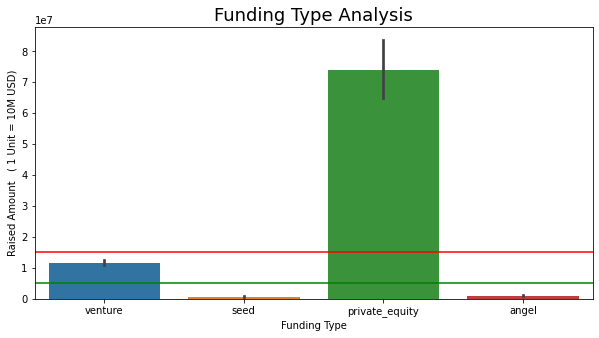

In [104]:
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')
plt.show()

2. A plot showing the top 9 countries against the total amount of investments of funding type FT.

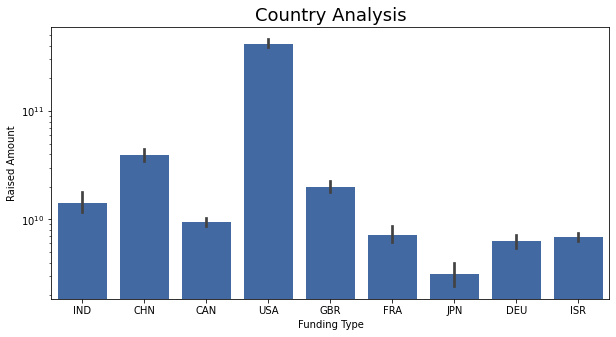

In [105]:
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type VENTURE)

For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.

In [106]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [107]:
master_D.shape

(8014, 15)

In [108]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [109]:
master_D.shape

(8424, 15)

In [110]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [111]:
master_D.shape

(8646, 15)

Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.

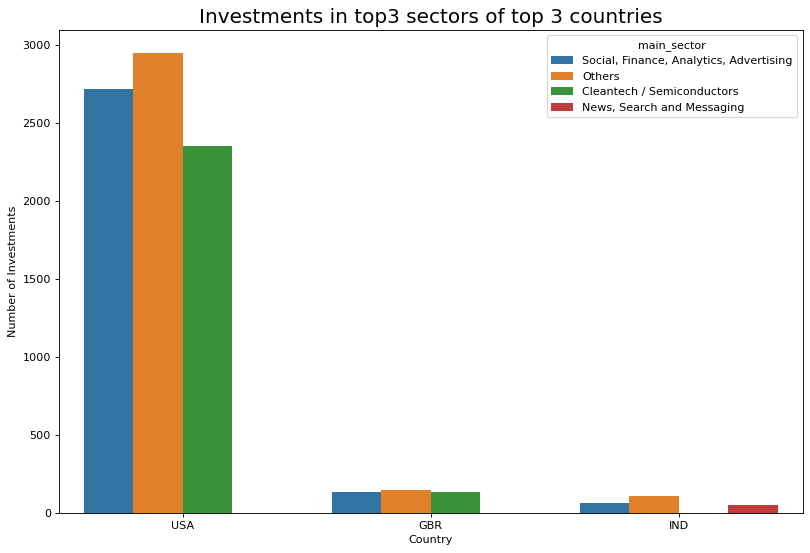

In [112]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()

## THANK YOU!